In [1]:
install.packages("tidyr")
install.packages("psych")
install.packages("car")
install.packages("lmtest")

library("lmtest")
library("car")
library("psych")
library("tidyr")
library("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit




##wczytanie danych

In [125]:
dane <- read.csv2("/content/ceny_produktow_rolniczych.csv")
dane <- dane %>% select(-X, -Okresy, -Rok)

In [126]:
names(dane) <- c("jeczmien", "pszenzyto", "owies", "kukurydza", "bydlo", "mleko")

In [105]:
str(dane)

'data.frame':	84 obs. of  6 variables:
 $ jeczmien : num  67.6 67.3 67.1 67.3 66.2 ...
 $ pszenzyto: num  62.1 61.4 61.9 62.4 62.4 ...
 $ owies    : num  52 52.3 51.9 51.9 53.3 ...
 $ kukurydza: num  59.6 60.5 61.8 62.4 64.8 ...
 $ bydlo    : num  6.58 6.47 6.34 6.58 6.63 6.49 6.42 6.52 6.48 6.51 ...
 $ mleko    : num  142 135 134 132 129 ...


### określenie zbiorów

In [127]:
trening = dane[1:67,]
test = dane[68:83,]

In [108]:
head(trening)

,jeczmien,pszenzyto,owies,kukurydza,bydlo,mleko
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,67.59,62.06,52.01,59.65,6.58,142.12
2,67.33,61.37,52.29,60.46,6.47,135.24
3,67.08,61.86,51.87,61.81,6.34,134.20
4,67.35,62.37,51.85,62.35,6.58,132.17
5,66.19,62.44,53.30,64.78,6.63,129.20
6,65.47,63.72,54.41,67.09,6.49,128.52


## model ekonometryczny

CEL: modelujemy wpływ cen zboża na cene mleka

zmienna zależna -- cena mleka

zmienne niezależne -- ceny zboża, plus cena bydła

In [129]:
colSums(is.na(trening))  # NA dla każdej kolumny

jeczmien pszenzyto     owies kukurydza     bydlo     mleko 
        0         0         0         0         0         0

### Dobór zmiennych objaśniających - analiza korelacji

### Zboża

Idea doboru zmiennych
objaśniających:

• możliwie silnie skorelowane ze zmienną
objaśnianą (y)

• możliwie słabo skorelowane między sobą

In [133]:
cor(trening$mleko, trening$jeczmien)
cor(trening$mleko, trening$pszenzyto)
cor(trening$mleko, trening$owies)
cor(trening$mleko, trening$kukurydza)

[1] 0.9163924

[1] 0.9145515

[1] 0.9547032

[1] 0.8525274

In [134]:
#macierz korelacji
korelacja = corr.test(trening)
korelacja$r
korelacja$p

,jeczmien,pszenzyto,owies,kukurydza,bydlo,mleko
jeczmien,1.0000000,0.9903047,0.9542461,0.8999328,0.9042169,0.9163924
pszenzyto,0.9903047,1.0000000,0.9440939,0.9086009,0.9181126,0.9145515
owies,0.9542461,0.9440939,1.0000000,0.8591847,0.9107811,0.9547032
kukurydza,0.8999328,0.9086009,0.8591847,1.0000000,0.8859689,0.8525274
bydlo,0.9042169,0.9181126,0.9107811,0.8859689,1.0000000,0.9444775
mleko,0.9163924,0.9145515,0.9547032,0.8525274,0.9444775,1.0000000


,jeczmien,pszenzyto,owies,kukurydza,bydlo,mleko
jeczmien,0.000000e+00,2.832208e-56,1.117370e-34,1.616695e-24,5.220852e-25,1.375569e-26
pszenzyto,1.888139e-57,0.000000e+00,5.434078e-32,1.465850e-25,7.992509e-27,2.409941e-26
owies,8.595152e-36,4.940071e-33,0.000000e+00,2.770674e-20,8.079486e-26,8.745076e-35
kukurydza,4.041738e-25,2.443083e-26,1.385337e-20,0.000000e+00,6.759111e-23,5.573992e-20
bydlo,1.044170e-25,7.992509e-28,1.154212e-26,2.253037e-23,0.000000e+00,4.768154e-32
mleko,1.528410e-27,3.012427e-27,6.246483e-36,5.573992e-20,3.973462e-33,0.000000e+00


Wszystkie zmienne wykazują bardzo silną korelacje

## regresja krokowa

In [139]:
model = lm(mleko ~ . -bydlo, data = trening)
summary(model)


Call:
lm(formula = mleko ~ . - bydlo, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.6502  -8.3957   0.2675   7.7496  22.2127 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  43.1886     6.6926   6.453 1.88e-08 ***
jeczmien     -0.5750     0.4813  -1.195    0.237    
pszenzyto     0.4534     0.4124   1.099    0.276    
owies         1.5283     0.2074   7.368 4.95e-10 ***
kukurydza     0.1916     0.1435   1.336    0.186    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.35 on 62 degrees of freedom
Multiple R-squared:  0.9174,	Adjusted R-squared:  0.912 
F-statistic: 172.1 on 4 and 62 DF,  p-value: < 2.2e-16


In [140]:
#usunięcie zmiennej pszenzyto (max pvalue)
model2 = lm(mleko ~ owies + kukurydza + jeczmien, data = trening)
summary(model2)


Call:
lm(formula = mleko ~ owies + kukurydza + jeczmien, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.6123  -6.7410  -0.0153   7.9660  22.3142 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.1696     5.6155   6.975 2.21e-09 ***
owies         1.5229     0.2077   7.332 5.26e-10 ***
kukurydza     0.2370     0.1376   1.722    0.090 .  
jeczmien     -0.1150     0.2383  -0.482    0.631    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.37 on 63 degrees of freedom
Multiple R-squared:  0.9157,	Adjusted R-squared:  0.9117 
F-statistic: 228.2 on 3 and 63 DF,  p-value: < 2.2e-16


In [141]:
#usunięcie zmiennej jeczmien
model3 = lm(mleko~owies+pszenzyto, data = trening)
summary(model3)


Call:
lm(formula = mleko ~ owies + pszenzyto, data = trening)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.457  -7.959   2.225   7.982  23.884 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.0959     5.0509   8.136 1.85e-11 ***
owies         1.4264     0.1899   7.513 2.33e-10 ***
pszenzyto     0.1828     0.1680   1.088    0.281    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.46 on 64 degrees of freedom
Multiple R-squared:  0.9131,	Adjusted R-squared:  0.9104 
F-statistic: 336.1 on 2 and 64 DF,  p-value: < 2.2e-16


In [142]:
model4 = lm(mleko~owies, data = trening)
summary(model4)


Call:
lm(formula = mleko ~ owies, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.5708  -8.0780   0.6779   9.2273  22.9984 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.09881    4.97313   8.465 4.36e-12 ***
owies        1.62145    0.06268  25.867  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.48 on 65 degrees of freedom
Multiple R-squared:  0.9115,	Adjusted R-squared:  0.9101 
F-statistic: 669.1 on 1 and 65 DF,  p-value: < 2.2e-16


$y = \alpha_0 + \alpha_1 \cdot owies + \alpha_2 \cdot bydło +\epsilon$

$mleko = 17.96 + 0.872 \cdot owies + 11.53 \cdot bydło + \epsilon$

### Automatyczny dobór zmiennych objaśniających

In [143]:
# automatyczna regresja krokowa z użyciem kryterium AIC
full_model <- lm(mleko ~ . -bydlo, data = trening)
model_auto <- step(full_model, direction = "both", trace = FALSE)

summary(model_auto)


Call:
lm(formula = mleko ~ owies + kukurydza, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.3199  -6.9842  -0.4101   7.9162  23.2962 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.3887     5.3447   7.183 8.89e-10 ***
owies         1.4416     0.1207  11.948  < 2e-16 ***
kukurydza     0.2022     0.1166   1.735   0.0876 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.29 on 64 degrees of freedom
Multiple R-squared:  0.9154,	Adjusted R-squared:  0.9128 
F-statistic: 346.4 on 2 and 64 DF,  p-value: < 2.2e-16


model otrzymany w wyniku regresji krokowej (oszacowane parametry modelu):

$y = \alpha_0 + \alpha_1 \cdot owies + \alpha_2 \cdot bydło -\alpha_3 \cdot kukurydza +\epsilon$

$mleko = 17.96 + 0.872 \cdot owies + 11.53 \cdot bydło - 0.118 \cdot kukurydza+ \epsilon$

In [54]:
# Obliczenie współczynników VIF
vif_values <- vif(model_auto)
print(vif_values)

    owies kukurydza     bydlo 
 4.771857  2.257995  3.600549 


### zboże + bydło

In [145]:
model_all = lm(mleko ~ ., data = trening)
summary(model_all)


Call:
lm(formula = mleko ~ ., data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.4296  -6.5450   0.0009   5.5834  26.0903 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 17.69326    7.02221   2.520   0.0144 *  
jeczmien     0.09940    0.40836   0.243   0.8085    
pszenzyto   -0.25546    0.35711  -0.715   0.4771    
owies        1.06233    0.18708   5.679 4.02e-07 ***
kukurydza   -0.05091    0.12398  -0.411   0.6828    
bydlo       10.73652    1.87119   5.738 3.21e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.03 on 61 degrees of freedom
Multiple R-squared:  0.9463,	Adjusted R-squared:  0.9419 
F-statistic: 215.1 on 5 and 61 DF,  p-value: < 2.2e-16


In [146]:
model_all_1 = lm(mleko ~ . - jeczmien, data = trening)
summary(model_all_1)


Call:
lm(formula = mleko ~ . - jeczmien, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.6763  -6.6931  -0.1932   5.5263  26.4617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.7577     5.4525   3.440  0.00105 ** 
pszenzyto    -0.1789     0.1679  -1.066  0.29075    
owies         1.0846     0.1620   6.696 7.21e-09 ***
kukurydza    -0.0480     0.1225  -0.392  0.69642    
bydlo        10.6054     1.7784   5.964 1.28e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.954 on 62 degrees of freedom
Multiple R-squared:  0.9463,	Adjusted R-squared:  0.9428 
F-statistic:   273 on 4 and 62 DF,  p-value: < 2.2e-16


In [149]:
model_all_2 = lm(mleko ~ . - jeczmien - kukurydza, data = trening)
summary(model_all_2)


Call:
lm(formula = mleko ~ . - jeczmien - kukurydza, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7489  -6.4656  -0.2891   5.3471  26.1510 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.5900     5.3991   3.443  0.00103 ** 
pszenzyto    -0.2097     0.1474  -1.422  0.15999    
owies         1.0913     0.1600   6.822 4.08e-09 ***
bydlo        10.3764     1.6683   6.220 4.47e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.887 on 63 degrees of freedom
Multiple R-squared:  0.9461,	Adjusted R-squared:  0.9436 
F-statistic: 368.9 on 3 and 63 DF,  p-value: < 2.2e-16


In [150]:
model_all_3 = lm(mleko ~ owies + bydlo, data = trening)
summary(model_all_3)


Call:
lm(formula = mleko ~ owies + bydlo, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.0807  -6.1648  -0.1011   6.1161  28.1162 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  19.8521     5.3679   3.698 0.000453 ***
owies         0.9414     0.1212   7.765 8.36e-11 ***
bydlo         9.3613     1.5198   6.160 5.40e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.965 on 64 degrees of freedom
Multiple R-squared:  0.9444,	Adjusted R-squared:  0.9427 
F-statistic: 543.7 on 2 and 64 DF,  p-value: < 2.2e-16


In [152]:
# automatyczna regresja krokowa z użyciem kryterium AIC
full_model <- lm(mleko ~ ., data = trening)
model_auto_all <- step(full_model, direction = "both", trace = FALSE)

summary(model_auto_all)


Call:
lm(formula = mleko ~ pszenzyto + owies + bydlo, data = trening)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.7489  -6.4656  -0.2891   5.3471  26.1510 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.5900     5.3991   3.443  0.00103 ** 
pszenzyto    -0.2097     0.1474  -1.422  0.15999    
owies         1.0913     0.1600   6.822 4.08e-09 ***
bydlo        10.3764     1.6683   6.220 4.47e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.887 on 63 degrees of freedom
Multiple R-squared:  0.9461,	Adjusted R-squared:  0.9436 
F-statistic: 368.9 on 3 and 63 DF,  p-value: < 2.2e-16


## Weryfikacja modelu

In [51]:
#weryfikacja modelu po regresji krokowej
summary(model4)


Call:
lm(formula = mleko ~ owies + bydlo)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.778  -5.506  -1.003   5.271  30.358 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.35054    4.63627   3.311   0.0014 ** 
owies        0.78353    0.09066   8.643 4.43e-13 ***
bydlo       11.49167    1.02374  11.225  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.879 on 80 degrees of freedom
Multiple R-squared:  0.9427,	Adjusted R-squared:  0.9412 
F-statistic: 657.8 on 2 and 80 DF,  p-value: < 2.2e-16


Współczynnik determinacja -- model wyjaśnia 94.3% zmienności ceny mleka

Odchylenie składnika losowego -- 9.88

Test F -- pvalue < 2.2e-16

### Sprawdzenie założeń dotyczących reszt

Założenia:
- symetryczne,
- rozkład normalny
- jednorodne wariancje w grupach,
- brak autokorelacji,
- losowość

In [35]:
reszty = model4$residuals

rozkład normalny

In [36]:
shapiro.test(reszty)
#H0 normalność
#H1 brak
# brak podstaw do odrzucenia H0


	Shapiro-Wilk normality test

data:  reszty
W = 0.97848, p-value = 0.1779


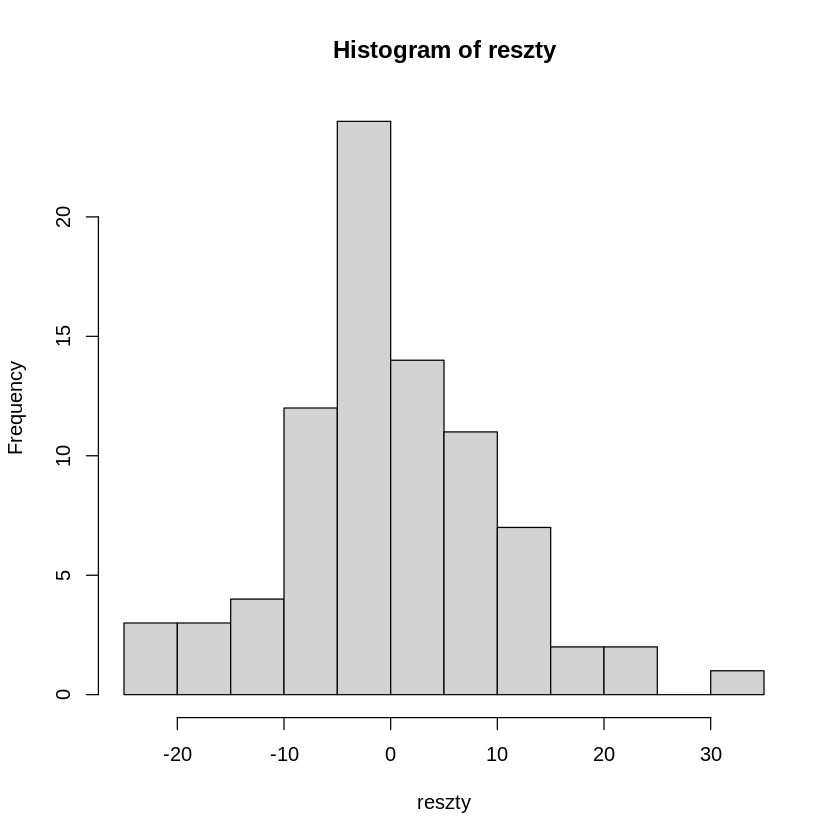

In [37]:
hist(reszty)

In [38]:
#H0 średnia równa 0
#H1 inna
# brak podstaw do odrzucenia H0
t.test(reszty)


	One Sample t-test

data:  reszty
t = -3.0879e-16, df = 82, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.130619  2.130619
sample estimates:
    mean of x 
-3.307261e-16 


autokorelacja

In [39]:
#H0 brak autokorelacji rzędu 1 -> jest 0
#H1 autokorelacja reszt
# odrzucamy H0, w modelu występuje autokorelacja reszt pierwszego rzędu
dwtest(model4)

#autokorelacja wyższego rzędu
coeftest(bgtest(model4, order = 10))


	Durbin-Watson test

data:  model4
DW = 0.40808, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



z test of coefficients:

               Estimate Std. Error z value  Pr(>|z|)    
(Intercept)   -0.266596   2.678698 -0.0995  0.920722    
owies         -0.189921   0.073378 -2.5883  0.009646 ** 
bydlo          1.799048   0.746963  2.4085  0.016019 *  
lag(resid)_1   0.797290   0.119003  6.6997 2.088e-11 ***
lag(resid)_2  -0.087750   0.152247 -0.5764  0.564365    
lag(resid)_3   0.128329   0.151871  0.8450  0.398118    
lag(resid)_4  -0.108107   0.149320 -0.7240  0.469069    
lag(resid)_5   0.020269   0.150814  0.1344  0.893089    
lag(resid)_6  -0.130754   0.158153 -0.8268  0.408376    
lag(resid)_7  -0.290716   0.158471 -1.8345  0.066579 .  
lag(resid)_8   0.096037   0.164061  0.5854  0.558296    
lag(resid)_9   0.080889   0.162768  0.4970  0.619220    
lag(resid)_10 -0.188751   0.126119 -1.4966  0.134495    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


jednorodność wariancji

In [40]:
#jednorodność wariancji
#H0 wariancje jednorodne
#H1 brak jednorodnośći
# odrzucamy H0
gqtest(model4)


	Goldfeld-Quandt test

data:  model4
GQ = 5.1285, df1 = 39, df2 = 38, p-value = 8.797e-07
alternative hypothesis: variance increases from segment 1 to 2


weryfikacja liniowości

In [45]:
harvtest(model4)

#H0 model jest liniowy (liniowość reszt)
#H1 brak liniowości reszt
# odrzucamy H0


	Harvey-Collier test

data:  model4
HC = 3.9741, df = 79, p-value = 0.0001552


In [46]:
raintest(model4)

#H0 model jest liniowy (liniowość reszt)
#H1 brak liniowości reszt
# brak podstaw do odrzucenia H0


	Rainbow test

data:  model4
Rain = 0.74637, df1 = 42, df2 = 38, p-value = 0.8223


In [47]:
resettest(model4)

#H0 model jest liniowy (liniowość reszt)
#H1 brak liniowości reszt
# odrzucamy H0


	RESET test

data:  model4
RESET = 8.0202, df1 = 2, df2 = 78, p-value = 0.0006798


wykresy diagnostyczne

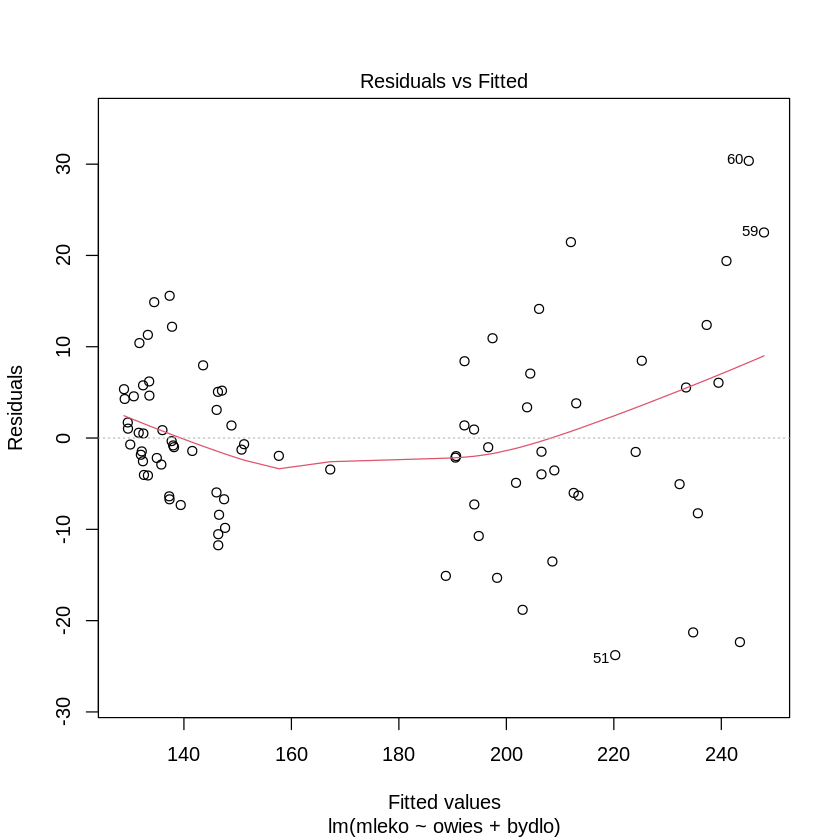

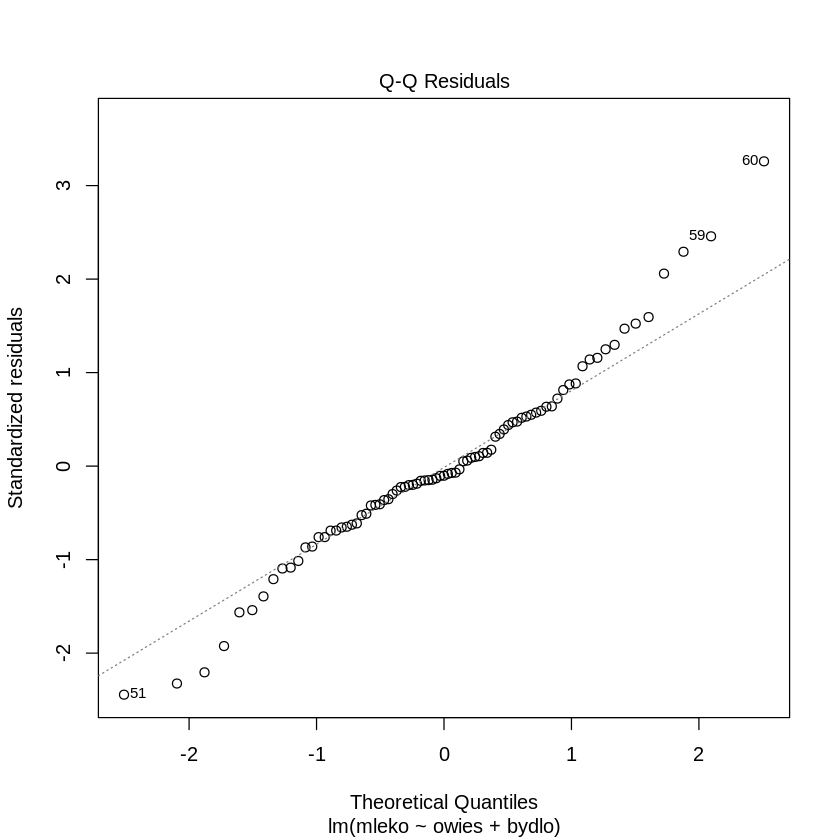

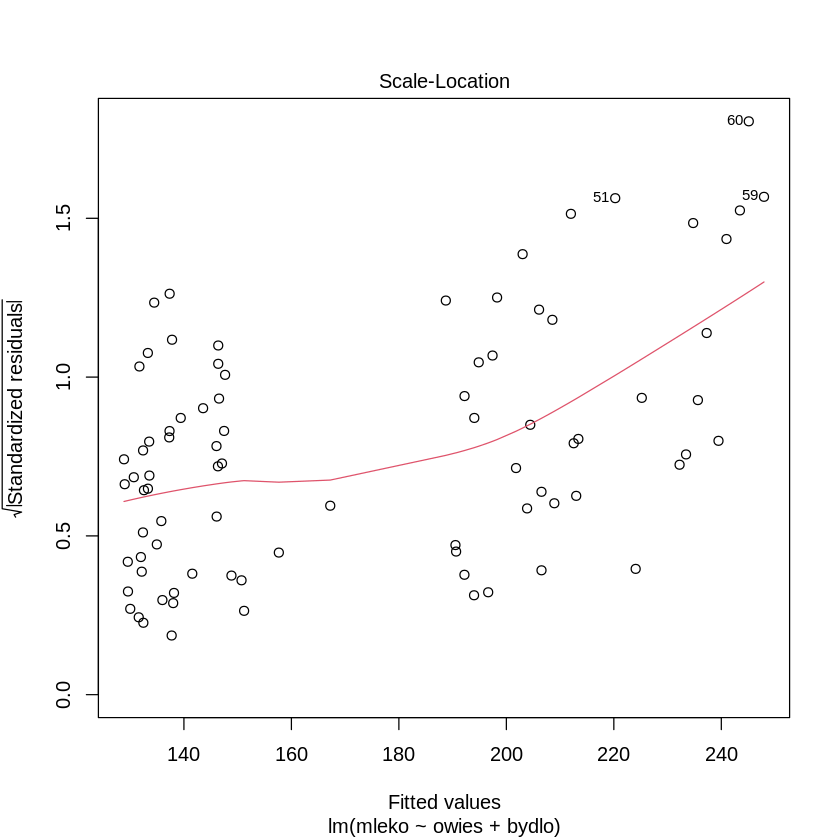

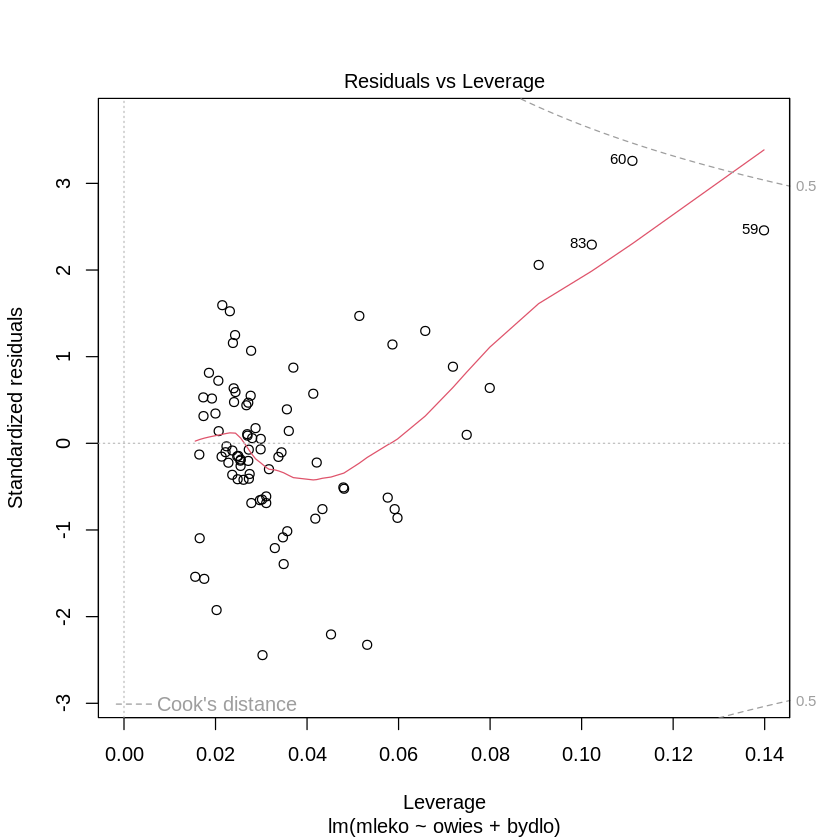

In [48]:
plot(model4)
#1 czy warość średnia jest równa 0 (linia przerywana to 0 dla reszt) -- tstudenta sprawdzone że nie odbiega
#2 normalność rozkładu (linia przerywana obrazuje silną korelacje dodatnią) -- odpowiednik shapiro (reszty 60 59 51 odbiegają ale nie pusją)
#3 określenie jednorodności wariancji
#4 obserwacje nietypowe (leverage) -- brak obserwacji nietypowej (powyżej cooks distance)

## Porównanie modeli - ANOVA

H0: model 2  nie jest istotnie lepszy od modelu 1

H1: jest

In [ ]:
anova(model_auto, model4)

## Ocena dokładności prognoz

### Ocena ex post

### Ocena ex ante